In [59]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr
import seaborn as sns
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing



In [60]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df

#drop id 
df = df.drop(['id'], axis=1)


In [61]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [62]:
df.describe()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [63]:
# find missing values 
df.isna().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [64]:
#add values to nans in bmi
df['bmi'] = df['bmi'].fillna(np.round(df.bmi.mean(), 2))
df


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0


In [65]:
#check for missing values 
df.isna().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [66]:
#look for duplicates
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool>

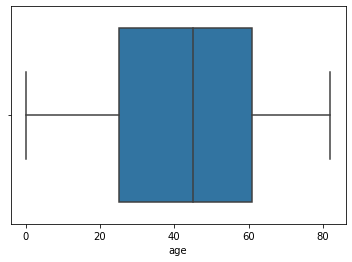

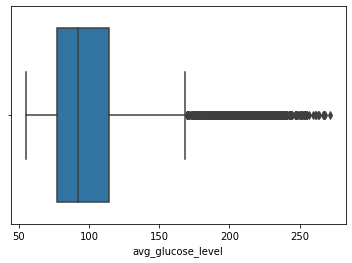

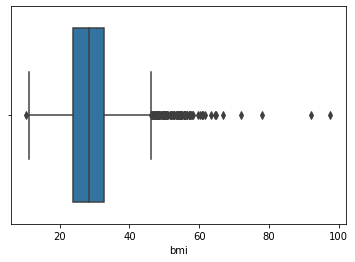

In [67]:
#look for outliars in numerical columns with continuous values 
num_cols = df.select_dtypes(include=['float', 'int'])

num_cols



# check if each column has continuous values
continuous_cols = []
for col in num_cols.columns:
    if num_cols[col].nunique() > 5:
        continuous_cols.append(col)

continuous_cols


for col in continuous_cols:
    ax = sns.boxplot(data=df, x=col)
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))
    plt.show()

In [68]:
#find categorial data 
categorial_data=df.loc[:,df.nunique() <= 5]
cat_cols = [col for col in df.columns if col in categorial_data]
for col in cat_cols:
    col_data = df[col].value_counts()
    print(col + " value count:")
    print(col_data)
    print ("####")

gender value count:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
####
hypertension value count:
0    4612
1     498
Name: hypertension, dtype: int64
####
heart_disease value count:
0    4834
1     276
Name: heart_disease, dtype: int64
####
ever_married value count:
Yes    3353
No     1757
Name: ever_married, dtype: int64
####
work_type value count:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
####
Residence_type value count:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
####
smoking_status value count:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
####
stroke value count:
0    4861
1     249
Name: stroke, dtype: int64
####


In [69]:
#remove other from gender 
df = df[df['gender'] != 'Other']
df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3978
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

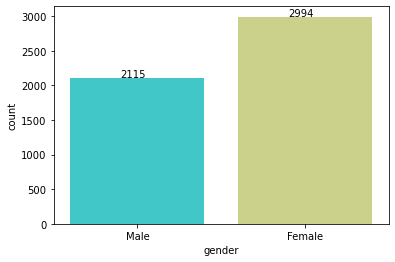

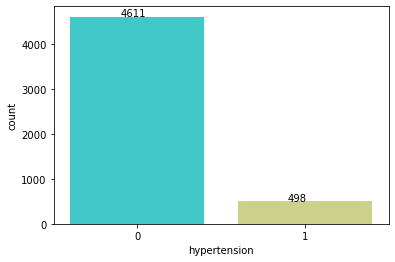

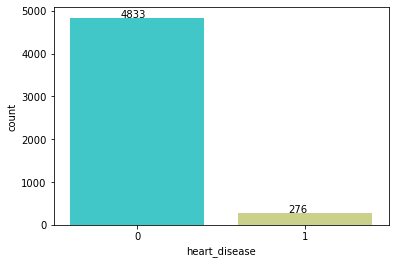

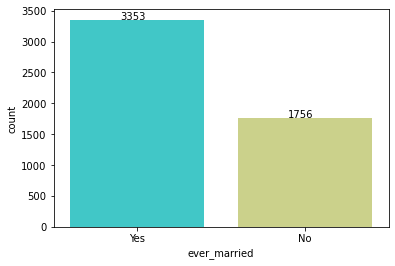

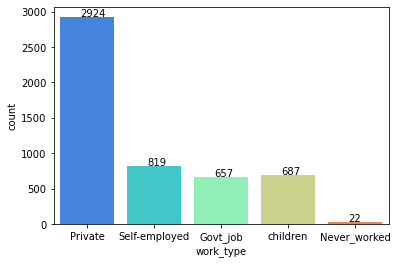

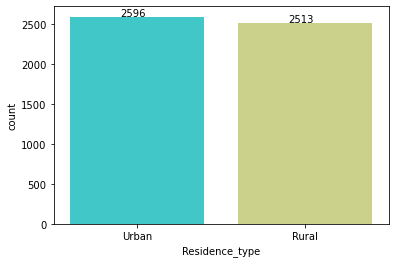

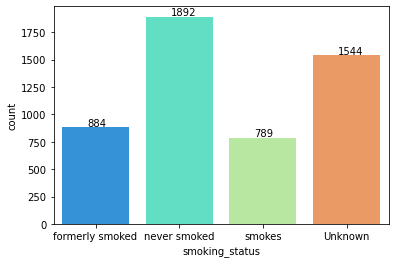

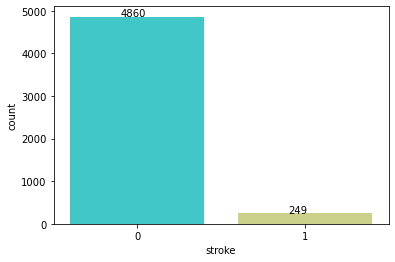

In [70]:
# count plot for categorial columns
categorial_data=df.loc[:,df.nunique() <= 5]
categorial_data
cat_cols = [col for col in df.columns if col in categorial_data]
for col in cat_cols:
    ax=sns.countplot(data=df,x=col, palette='rainbow')
    for p in ax.patches:
            ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10
            ))
    plt.show()

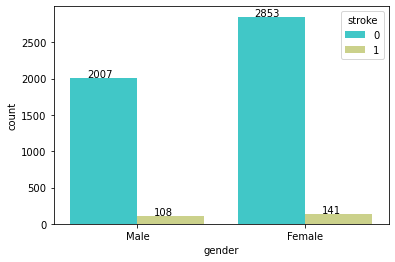

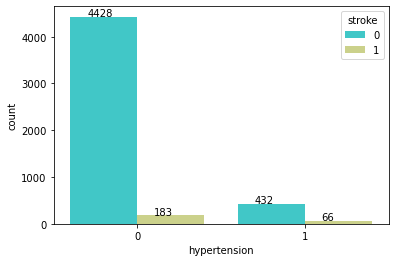

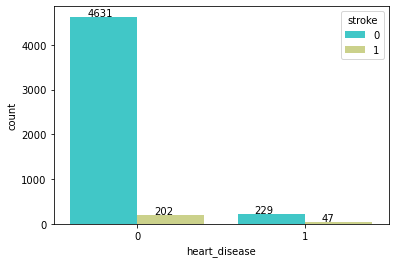

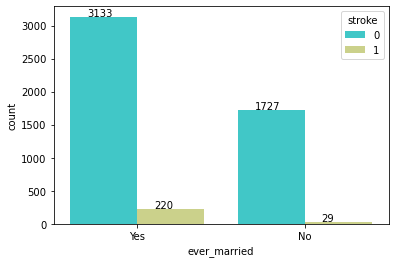

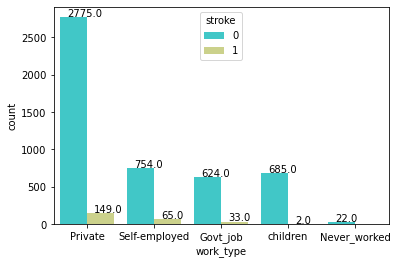

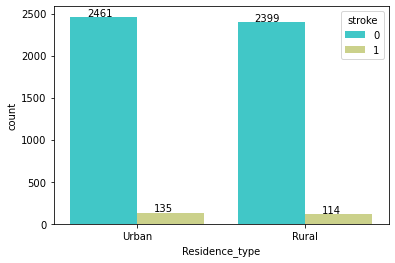

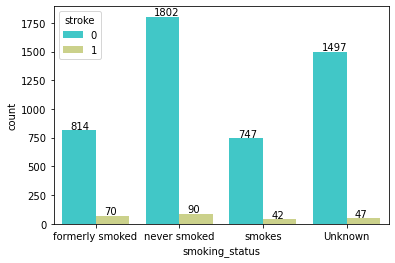

In [71]:
# count plot for categorial columns divided by stroke status
for col in cat_cols:
    if col != 'stroke':
        ax=sns.countplot(data=df,x=col, palette='rainbow', hue='stroke')
        for p in ax.patches:
                ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10
                ))
        plt.show()

In [72]:
# change categorial columns to numbers 
cat_cols = [col for col in df.columns
                        if df[col].dtype == 'object']
encoder = preprocessing.LabelEncoder()

for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])
df

<ipython-input-72-8e04015bbf87>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col])


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60,1,1
1,0,61.0,0,0,1,3,0,202.21,28.89,2,1
2,1,80.0,0,1,1,2,0,105.92,32.50,2,1
3,0,49.0,0,0,1,2,1,171.23,34.40,3,1
4,0,79.0,1,0,1,3,0,174.12,24.00,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.89,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.00,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.60,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.60,1,0


<AxesSubplot:>

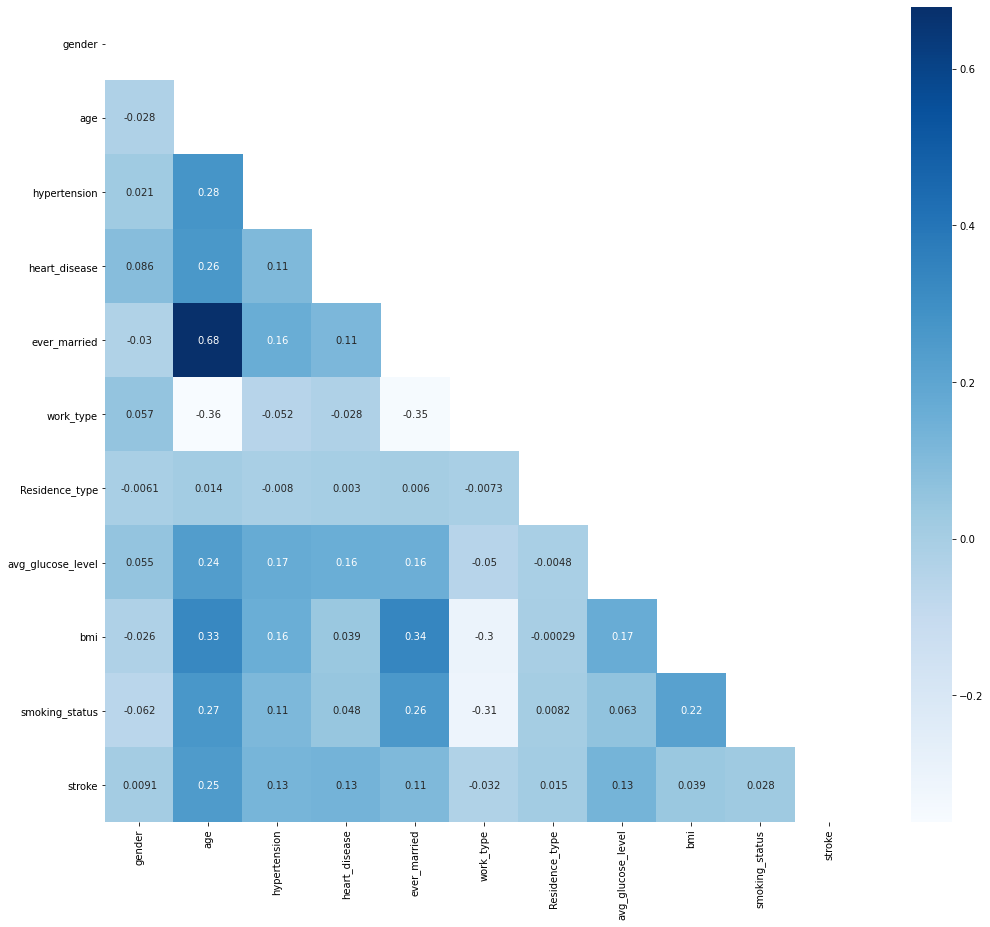

In [73]:
#correlation
plt.figure(figsize=(17, 15))
corr_mask = np.triu(df.corr())
h_map = sns.heatmap(df.corr(), mask=corr_mask, cmap='Blues',annot= True)
h_map

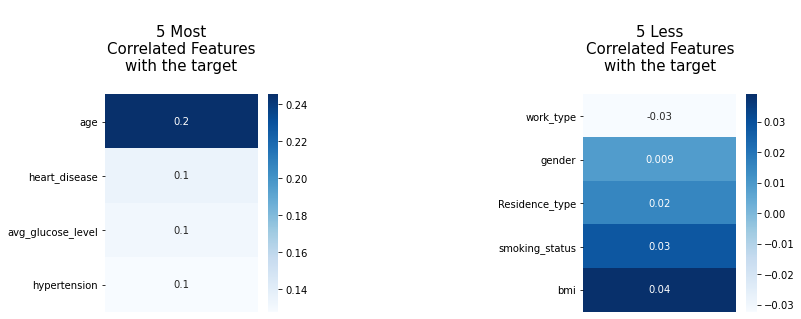

In [75]:
import matplotlib.gridspec as gridspec

#DF with the features with the highest correlation and the target is removed.
corr_higher = pd.DataFrame(df.corr()['stroke'].sort_values(ascending=False)).head()
corr_higher = corr_higher.drop('stroke', axis=0)

# DF with the features with less correlation.
corr_less = pd.DataFrame(df.corr()['stroke'].sort_values()).head()

# List of DFs of Correlations
corr_ls = [corr_higher, corr_less]

# Plot Description.
description  = [str(f'\n5 Most\nCorrelated Features\nwith the target\n'), str(f'5 Less\nCorrelated Features\nwith the target\n')]
# Grid Plot.
fig = plt.figure(figsize=(12,4))
gs = gridspec.GridSpec(1,2)
gs.update(wspace=1.5, hspace=0.35)

# With a loop, we assign each feature a consecutive number.
for i, j in enumerate(corr_ls):
    ax = plt.subplot(gs[i])
    sns.heatmap(corr_ls[i], annot=True, fmt='.1g',cmap='Blues', cbar=True)
    ax.set_title(description[i], fontsize=15)
    ax.set_xlabel('')
    ax.set_xticklabels([])
    ax.tick_params(bottom=False)
plt.show()

In [76]:
#spliting the data
X = df.drop(['stroke','ever_married','work_type','Residence_type','gender','bmi','smoking_status'], axis=1)
y = df.stroke
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



In [77]:
# Training different models

# SVM

from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear', random_state = 0)
classifier_svc.fit(X_train, y_train)


# Kernel SVM

classifier_rbf = SVC(kernel = 'rbf', random_state = 0)
classifier_rbf.fit(X_train, y_train)



# K Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)



# Decsion Tree

from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)




DecisionTreeClassifier(criterion='entropy', random_state=0)

In [78]:
# Finding predictions 

y_pred_svc = classifier_svc.predict(X_test)


y_pred_rbf = classifier_rbf.predict(X_test)


y_pred_knn = classifier_knn.predict(X_test)


y_pred_dt = classifier_dt.predict(X_test)


In [79]:
# Finding accuracy 

from sklearn.metrics import accuracy_score

print("SVM - " , accuracy_score(y_test, y_pred_svc))


print("Kernel SVM - ", accuracy_score(y_test, y_pred_rbf))


print("KNN - " , accuracy_score(y_test, y_pred_knn))


print("Decision Tree - ", accuracy_score(y_test, y_pred_dt))



SVM -  0.9491392801251957
Kernel SVM -  0.9491392801251957
KNN -  0.945226917057903
Decision Tree -  0.9162754303599374
